In [40]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from PIL import Image
import os
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

In [41]:
import os
os.getcwd()

'c:\\Users\\sshah77\\Downloads\\gtsrb-german-traffic-sign\\Train'

In [42]:
print(os.getcwd())

c:\Users\sshah77\Downloads\gtsrb-german-traffic-sign\Train


In [37]:
#cd/Users/dbasava/Desktop/Darshan Doc/5660/Train

os.chdir('c:\\Users\\sshah77\\Downloads\\gtsrb-german-traffic-sign\\Train')
#cd/Users/sshah77/Downloads/gtsrb-german-traffic-sign/Train

In [44]:
# loading dataset
data = []
labels = []
classes = 43
cur_path = os.getcwd()


for i in os.listdir(cur_path):
    dir = cur_path + '/' + i
    for j in os.listdir(dir):
        img_path = dir+'/'+j
        img = cv2.imread(img_path,-1)
        img = cv2.resize(img, (28,28), interpolation = cv2.INTER_NEAREST)
        data.append(img)
        labels.append(i)

In [45]:
data = np.array(data)
labels = np.array(labels)
print(data.shape, labels.shape)

(39209, 28, 28, 3) (39209,)


In [46]:
print(data.shape, labels.shape)
#Splitting training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(39209, 28, 28, 3) (39209,)
(31367, 28, 28, 3) (7842, 28, 28, 3) (31367,) (7842,)


In [47]:
#Converting the labels into one hot encoding
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)

In [48]:
y_train.shape, y_test.shape

((31367, 43), (7842, 43))

In [50]:
train_data=pd.read_csv('c:\\Users\\sshah77\\Downloads\\gtsrb-german-traffic-sign\\train.csv',usecols=['ClassId','Path','Width','Height'],)
test_data=pd.read_csv('c:\\Users\\sshah77\\Downloads\\gtsrb-german-traffic-sign\\test.csv',usecols=['ClassId','Path','Width','Height'],)

train_data.rename({'ClassId':'label','Path':'path'},inplace=True,axis=1)
test_data.rename({'ClassId':'label','Path':'path'},inplace=True,axis=1)

train_data.head()
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39209 entries, 0 to 39208
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Width   39209 non-null  int64 
 1   Height  39209 non-null  int64 
 2   label   39209 non-null  int64 
 3   path    39209 non-null  object
dtypes: int64(3), object(1)
memory usage: 1.2+ MB


In [51]:
test_data.head()

,Width,Height,label,path
0,53,54,16,Test/00000.png
1,42,45,1,Test/00001.png
2,48,52,38,Test/00002.png
3,27,29,33,Test/00003.png
4,60,57,11,Test/00004.png


In [52]:
print('NO. of classes')
print(train_data['label'].nunique())

NO. of classes
43


In [53]:
os.chdir('c:\\Users\\sshah77\\Downloads\\gtsrb-german-traffic-sign')

In [54]:
os.getcwd()

'c:\\Users\\sshah77\\Downloads\\gtsrb-german-traffic-sign'

C:\Users\sshah77\AppData\Local\Temp\ipykernel_21176\680849438.py:13: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=None)


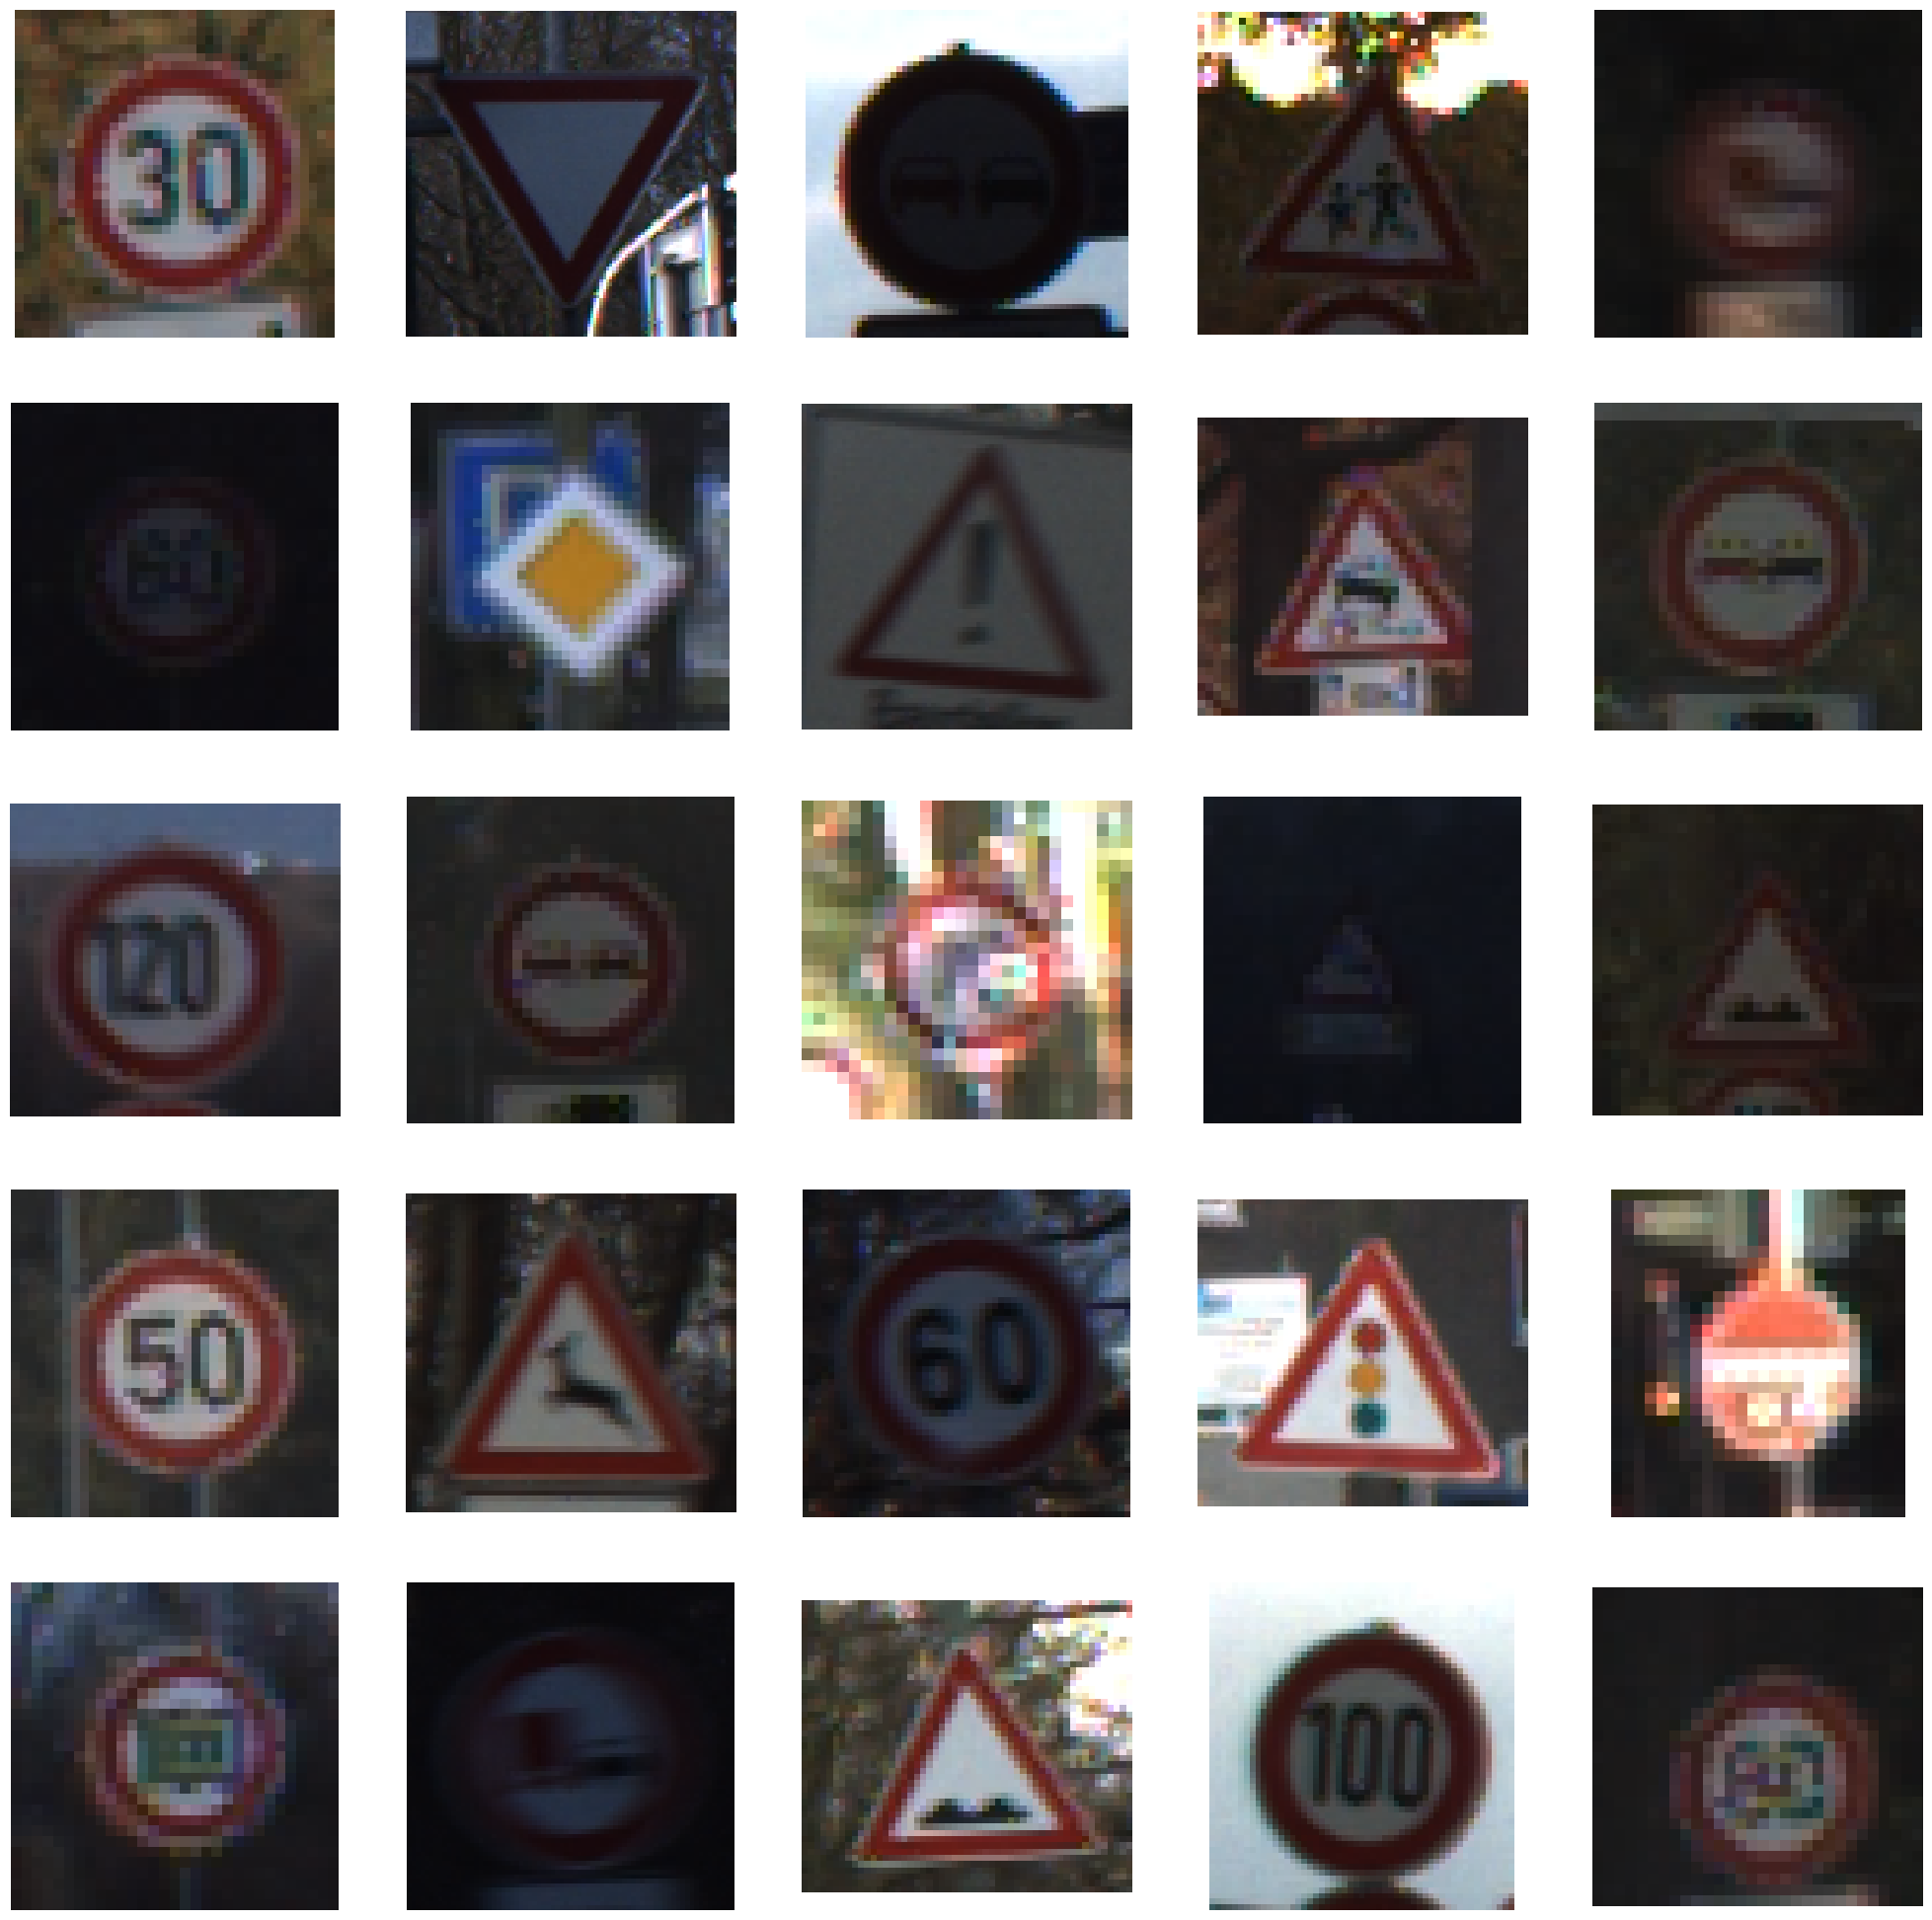

In [55]:
import random
from matplotlib.image import imread
data_dir= os.getcwd()
imgs=test_data['path'].values
plt.figure(figsize=(25,25))

i = 1
while i <= 25:
    plt.subplot(5, 5, i)
    random_image_path = data_dir + '/' + imgs[random.randint(0, len(imgs)-1)]
    random_image = imread(random_image_path)
    plt.imshow(random_image)
    plt.grid(b=None)
    plt.axis('off')
    plt.xlabel(random_image.shape[0], fontsize=20)
    plt.ylabel(random_image.shape[0], fontsize=20)
    i += 1

In [56]:
os.chdir('c:\\Users\\sshah77\\Downloads\\gtsrb-german-traffic-sign\\Train')

Text(0, 0.5, 'Number of images')

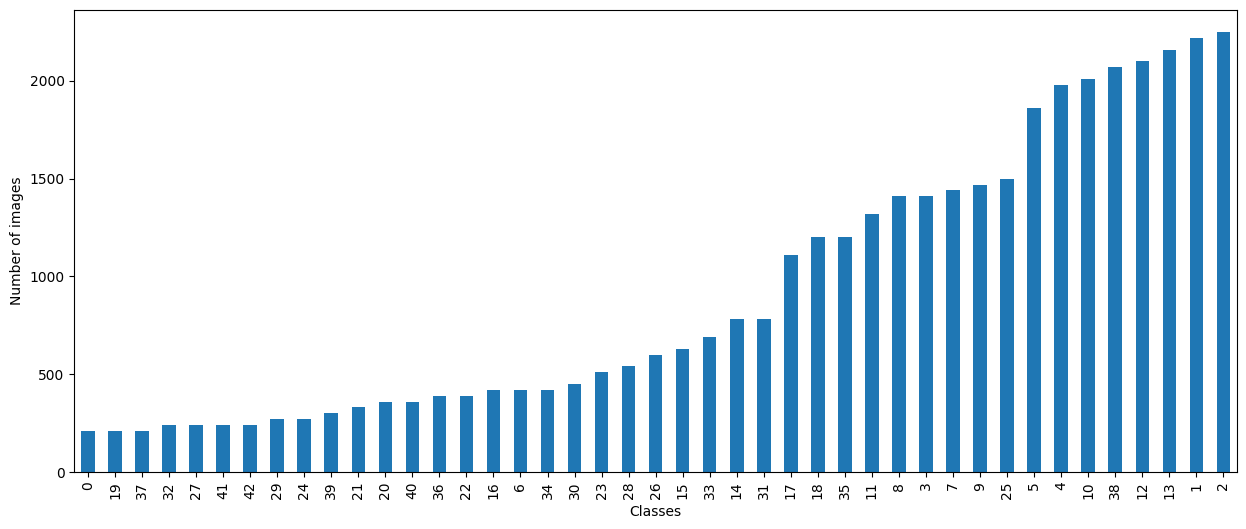

In [57]:
# number of images in each class
data_dic = {}
for folder in os.listdir(cur_path):
    data_dic[folder] = len(os.listdir(cur_path + '/' + folder))

data_df= pd.Series(data_dic)
plt.figure(figsize = (15, 6))
data_df.sort_values().plot(kind = 'bar')
plt.xlabel('Classes')
plt.ylabel('Number of images')

In [58]:
#Building the model
model = Sequential()

# First Layer
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))

# Second Layer 
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))


# Dense Layer
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='softmax'))

In [59]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 32)        2432      
                                                                 
 conv2d_1 (Conv2D)           (None, 20, 20, 32)        25632     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 10, 10, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 10, 10, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 64)          18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 6, 6, 64)          36928     
                                                        

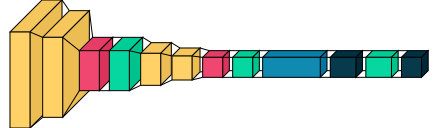

In [62]:
import visualkeras
visualkeras.layered_view(model)

In [63]:
#Compilation of the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
epochs = 5
history = model.fit(X_train, y_train, batch_size=64, epochs=epochs, validation_data=(X_test, y_test))
model.save("../output/my_model.h5")

Epoch 1/5
491/491 [==============================] - 44s 86ms/step - loss: 2.5695 - accuracy: 0.3844 - val_loss: 0.8514 - val_accuracy: 0.7725
Epoch 2/5
491/491 [==============================] - 41s 84ms/step - loss: 0.9753 - accuracy: 0.7088 - val_loss: 0.4448 - val_accuracy: 0.8667
Epoch 3/5
491/491 [==============================] - 39s 80ms/step - loss: 0.6217 - accuracy: 0.8122 - val_loss: 0.1834 - val_accuracy: 0.9464
Epoch 4/5
491/491 [==============================] - 38s 78ms/step - loss: 0.4477 - accuracy: 0.8662 - val_loss: 0.1484 - val_accuracy: 0.9586
Epoch 5/5
491/491 [==============================] - 39s 79ms/step - loss: 0.3795 - accuracy: 0.8870 - val_loss: 0.1196 - val_accuracy: 0.9630


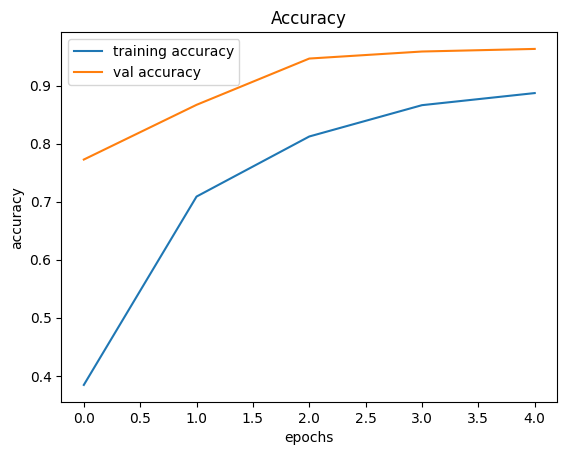

In [64]:
#plotting graphs for accuracy 
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

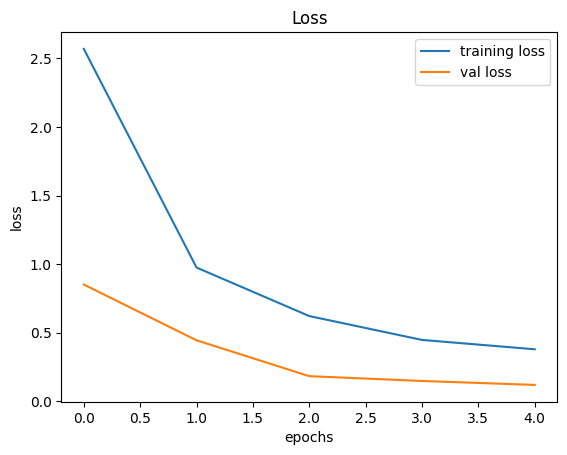

In [65]:
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [66]:
# Score
score = model.evaluate(X_test, y_test, verbose=0)
print('Test Loss', score[0])
print('Test accuracy', score[1])

Test Loss 0.11958478391170502
Test accuracy 0.963019609451294


In [67]:
y_pred = model.predict(X_test)
y_test_class = np.argmax(y_test,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)

246/246 [==============================] - 3s 11ms/step


In [68]:
from sklearn.metrics import classification_report
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test_class,y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class))

              precision    recall  f1-score   support

           0       1.00      0.68      0.81        38
           1       0.97      0.91      0.94       496
           2       0.94      0.95      0.95       420
           3       0.94      0.93      0.94       294
           4       0.94      0.99      0.96       400
           5       0.89      0.91      0.90       364
           6       0.95      1.00      0.97        69
           7       0.93      0.95      0.94       313
           8       0.93      0.95      0.94       274
           9       0.99      0.98      0.99       277
          10       0.99      0.99      0.99       398
          11       0.95      0.98      0.97       261
          12       1.00      0.99      1.00       443
          13       1.00      1.00      1.00       422
          14       0.99      0.98      0.99       135
          15       0.99      0.99      0.99       118
          16       0.99      1.00      0.99        86
          17       0.99    

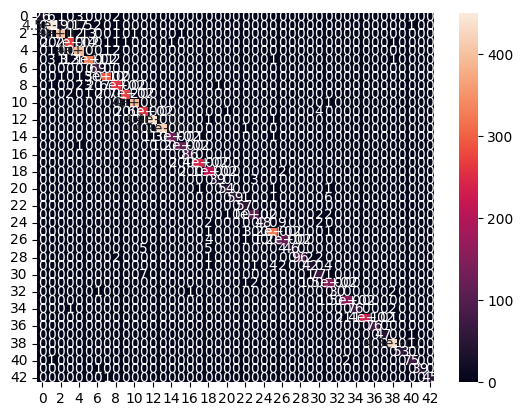

In [71]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test_class, y_pred_class)
import seaborn as sns
sns.heatmap(cm,annot=True)
plt.savefig('../output/h1.png')

In [72]:
# Calculate the Accuracy
from sklearn.metrics import accuracy_score
cnn_accuracy=accuracy_score(y_pred_class,y_test_class)
cnn_accuracy



0.9630196378474879

In [73]:
model.save('../output/traffic_classifier.h5')

In [80]:
import tkinter as tk
from tkinter import filedialog
from tkinter import *
from PIL import ImageTk, Image

import numpy
#load the trained model to classify sign
from keras.models import load_model
model = load_model('../output/traffic_classifier.h5')

#dictionary to label all traffic signs class.
classes = { 1:'Speed limit (20km/h)',
            2:'Speed limit (30km/h)', 
            3:'Speed limit (50km/h)', 
            4:'Speed limit (60km/h)', 
            5:'Speed limit (70km/h)', 
            6:'Speed limit (80km/h)', 
            7:'End of speed limit (80km/h)', 
            8:'Speed limit (100km/h)', 
            9:'Speed limit (120km/h)', 
            10:'No passing', 
            11:'No passing veh over 3.5 tons', 
            12:'Right-of-way at intersection', 
            13:'Priority road', 
            14:'Yield', 
            15:'Stop', 
            16:'No vehicles', 
            17:'Veh > 3.5 tons prohibited', 
            18:'No entry', 
            19:'General caution', 
            20:'Dangerous curve left', 
            21:'Dangerous curve right', 
            22:'Double curve', 
            23:'Bumpy road', 
            24:'Slippery road', 
            25:'Road narrows on the right', 
            26:'Road work', 
            27:'Traffic signals', 
            28:'Pedestrians', 
            29:'Children crossing', 
            30:'Bicycles crossing', 
            31:'Beware of ice/snow',
            32:'Wild animals crossing', 
            33:'End speed + passing limits', 
            34:'Turn right ahead', 
            35:'Turn left ahead', 
            36:'Ahead only', 
            37:'Go straight or right', 
            38:'Go straight or left', 
            39:'Keep right', 
            40:'Keep left', 
            41:'Roundabout mandatory', 
            42:'End of no passing', 
            43:'End no passing veh > 3.5 tons' }

#initialise GUI
top=tk.Tk()
top.geometry('800x600')
top.title('Traffic sign classification')
top.configure(background='#CDCDCD')

label=Label(top,background='#CDCDCD', font=('arial',15,'bold'))
sign_image = Label(top)

def classify(file_path):
    global label_packed
    image = Image.open(file_path)
    image = image.resize((28,28))
    image = numpy.expand_dims(image, axis=0)
    image = numpy.array(image)
    pred = numpy.argmax(model.predict([image]), axis=-1)[0]
    sign = classes[pred+1]
    print(sign)
    label.configure(foreground='#011638', text=sign) 

def show_classify_button(file_path):
    classify_b=Button(top,text="Classify",command=lambda: classify(file_path),padx=10,pady=5)
    classify_b.configure(background='#364156', foreground='Red',font=('arial',14,'bold'))
    classify_b.place(relx=0.79,rely=0.46)

def upload_image():
    try:
        file_path=filedialog.askopenfilename()
        uploaded=Image.open(file_path)
        uploaded.thumbnail(((top.winfo_width()/4.25),(top.winfo_height()/4.25)))
        im=ImageTk.PhotoImage(uploaded)

        sign_image.configure(image=im)
        sign_image.image=im
        label.configure(text='')
        show_classify_button(file_path)
    except:
        pass

upload=Button(top,text="Upload an image",command=upload_image,padx=30,pady=10)
upload.configure(background='#364156', foreground='white',font=('arial',14,'bold'))

upload.pack(side=BOTTOM,pady=60)
sign_image.pack(side=BOTTOM,expand=True)
label.pack(side=BOTTOM,expand=True)
heading = Label(top, text="Identify the Traffic Sign",pady=20, font=('arial',20,'bold'))
heading.configure(background='#CDCDCD',foreground='#364156')
heading.pack()
top.mainloop()

1/1 [==============================] - 0s 209ms/step
Speed limit (30km/h)


SVM

In [1]:
import cv2
import numpy as np
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from skimage.feature import hog
import os

In [2]:

# Define class names (assuming folder names in dataset represent class names)
class_names = ['Speed limit (20km/h)', 'Speed limit (30km/h)', 'Speed limit (50km/h)', 'Speed limit (60km/h)', 
               'Speed limit (70km/h)', 'Speed limit (80km/h)', 'End of speed limit (80km/h)', 'Speed limit (100km/h)', 
               'Speed limit (120km/h)', 'No passing', 'No passing for vehicles over 3.5 metric tons', 
               'Right-of-way at the next intersection', 'Priority road', 'Yield', 'Stop', 'No vehicles', 
               'Vehicles over 3.5 metric tons prohibited', 'No entry', 'General caution', 'Dangerous curve to the left', 
               'Dangerous curve to the right', 'Double curve', 'Bumpy road', 'Slippery road', 'Road narrows on the right', 
               'Road work', 'Traffic signals', 'Pedestrians', 'Children crossing', 'Bicycles crossing', 'Beware of ice/snow', 
               'Wild animals crossing', 'End of all speed and passing limits', 'Turn right ahead', 'Turn left ahead', 
               'Ahead only', 'Go straight or right', 'Go straight or left', 'Keep right', 'Keep left', 'Roundabout mandatory', 
               'End of no passing', 'End of no passing by vehicles over 3.5 metric tons']

In [3]:
os.chdir('c:\\Users\\sshah77\\Downloads\\gtsrb-german-traffic-sign')

In [4]:
# Load dataset
data_folder = 'Train'
data = []
labels = []
try:
    for label in os.listdir(data_folder):
        path = os.path.join(data_folder, label)
        for img_name in os.listdir(path):
            img_path = os.path.join(path, img_name)
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            img = cv2.resize(img, (28, 28)) # resize image to 28x28
            hog_features = hog(img, orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2, 2))
            data.append(hog_features)
            labels.append(int(label))
except Exception as e:
    print(str(e))


In [5]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

# Train SVM classifier
clf = svm.SVC(kernel='linear', C=1, gamma='scale')
clf.fit(X_train, y_train)

SVC(C=1, kernel='linear')

In [6]:
# Predict labels for test data
y_pred = clf.predict(X_test)

# Print predicted and ground truth labels for each test image
for i in range(len(y_pred)):
    print("Predicted: ", class_names[y_pred[i]], "\tGround Truth: ", class_names[y_test[i]])

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Predicted:  Speed limit (120km/h) 	Ground Truth:  Speed limit (70km/h)
Predicted:  Right-of-way at the next intersection 	Ground Truth:  Beware of ice/snow
Predicted:  Children crossing 	Ground Truth:  Children crossing
Predicted:  Speed limit (50km/h) 	Ground Truth:  Speed limit (50km/h)
Predicted:  Wild animals crossing 	Ground Truth:  Wild animals crossing
Predicted:  Road work 	Ground Truth:  Road work
Predicted:  Speed limit (70km/h) 	Ground Truth:  Speed limit (70km/h)
Predicted:  No vehicles 	Ground Truth:  No passing for vehicles over 3.5 metric tons
Predicted:  Bumpy road 	Ground Truth:  Bumpy road
Predicted:  Speed limit (50km/h) 	Ground Truth:  Speed limit (100km/h)
Predicted:  No passing for vehicles over 3.5 metric tons 	Ground Truth:  No passing for vehicles over 3.5 metric tons
Predicted:  General caution 	Ground Truth:  General caution
Predicted:  Pedestrians 	Ground Truth:  Pedestrians
Predicted:  Speed limit (70km/h) 	Ground Truth:  Speed limit (70km/h)
Predicted:  Sp

In [8]:
clf.fit(data, labels)
test_img_path = '00001.png'

test_img = cv2.imread(test_img_path, cv2.IMREAD_GRAYSCALE)

test_img = cv2.resize(test_img, (28, 28))

test_features = hog(test_img, orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2, 2))
predicted_label = clf.predict([test_features])[0]

signnames = {}
with open('signnames.csv', 'r') as file:
    next(file) # skip header row
    for line in file:
        parts = line.strip().split(',')
        index = int(parts[0].strip('" ')) # strip any unwanted characters
        signnames[index] = parts[1].strip()

sign_name = signnames[predicted_label]


print("Predicted traffic sign label:", sign_name)

Predicted traffic sign label: General caution"
